In [1]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np

from tqdm import tqdm

In [2]:
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

import severability

In [3]:
G = nx.triangular_lattice_graph(10,10)
A = nx.adjacency_matrix(G).toarray()
P = severability.transition_matrix(A)

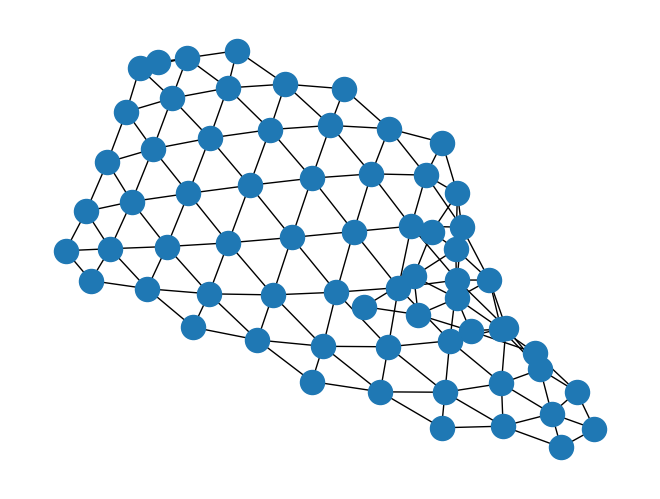

In [4]:
nx.draw(G)

In [11]:
times = np.arange(0,4,1)
n_communities = np.zeros_like(times)
s_communities = np.zeros_like(times)

for i in tqdm(range(len(times))):
    t = times[i]
    partition = severability.component_cover(P,t=t)
    n_communities[i] = len(partition)
    sizes = np.zeros(len(partition))
    for j in range((len(partition))):
        sizes[j] = len(partition[j][0])
    s_communities[i] = sizes.mean()
    

100%|██████████| 4/4 [00:26<00:00,  6.72s/it]


[Text(0.5, 0, 'time'), Text(0, 0.5, 'number communities')]

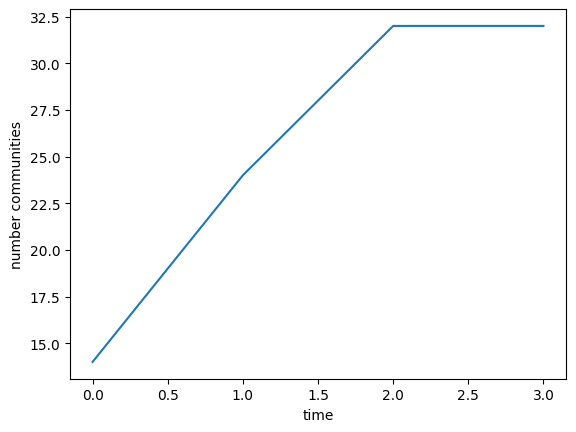

In [12]:
fig, ax = plt.subplots(1)
ax.plot(times,n_communities)
ax.set(xlabel="time", ylabel="number communities")

[Text(0.5, 0, 'time'), Text(0, 0.5, 'mean community size')]

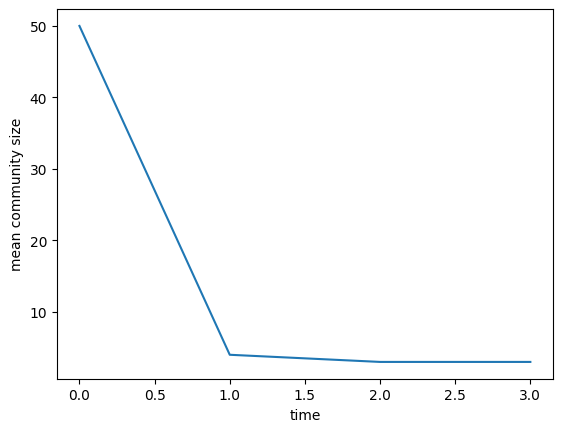

In [13]:
fig, ax = plt.subplots(1)
ax.plot(times,s_communities)
ax.set(xlabel="time", ylabel="mean community size")